In [2]:
from numpy import *
import numpy.linalg as la
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### solve Schrodinger eq without any fancy symbolic stuff

In [108]:
## simple Rabi oscillation in two level atom

psi0 = array([1,0], complex) # population starts in |g>

delta = 10
omega = 2*pi

# atom+field Hamiltonian, hbar=1
Haf = array([[0,-omega/2],[-omega/2,0]])

numsteps = 100
tmin = 0
tmax = 3 
tpts = linspace(tmin,tmax,numsteps)

dpsi = lambda t,state: -1j*dot(Haf,state)

soln = solve_ivp(dpsi,[tmin,tmax],psi0, t_eval=tpts,vectorized=True)

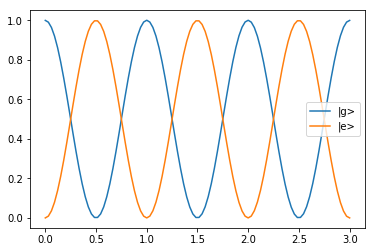

In [110]:
labels = ['|g>','|e>']
for i,y in enumerate(soln.y):
    plt.plot(soln.t,real(conjugate(y)*y),label=labels[i])
plt.legend(loc='best')

## Rabi experiment - four levels

In [112]:
## Rabi oscillation in four level NV center

# triplet manifold, ignoring the m=-1
#
#         ---- mf=+1, +200 MHz detuned by N spin
#       /
# ms=-1 ---- ms=+1, 0 MHz detuned by N spin.
#  |    \
#  |     ---- ms=+1, +200 MHz detuned by N spin
#  |
#  | ~ 2.85 GHz
#  |
#  |
# ms=0 ----

psi0 = array([1,0,0,0], complex) # population starts in |g>

d1 = -2*pi*2.2 # MHz
d2 = 0
d3 = -d1
o1 = o2 = o3 = 2*pi*0.1 # assume that all transitions between ms=0 and ms=1 are driven equally (unpolarized light?)

# atom+field Hamiltonian, hbar=1
# Haf = lambda t : 0.5*array([[0,-o1*exp(1j*d1*t),-o2*exp(1j*d2*t),-o3*exp(1j*d3*t)],
#                             [-o1*exp(-1j*d1*t),2*d1,0,0],
#                             [-o2*exp(-1j*d2*t),0,2*d2,0],
#                             [-o3*exp(-1j*d3*t),0,0,2*d3]])

Haf = lambda t : 0.5*array([[0,-o1*exp(1j*d1*t),-o2*exp(1j*d2*t),-o3*exp(1j*d3*t)],
                            [-o1*exp(-1j*d1*t),0,0,0],
                            [-o2*exp(-1j*d2*t),0,0,0],
                            [-o3*exp(-1j*d3*t),0,0,0]])

numsteps = 100
tmin = 0
tmax = 4*pi/o1
tpts = linspace(tmin,tmax,numsteps)

dpsi = lambda t,state: -1j*dot(Haf(t),state)

soln = solve_ivp(dpsi,[tmin,tmax],psi0, t_eval=tpts,vectorized=True)

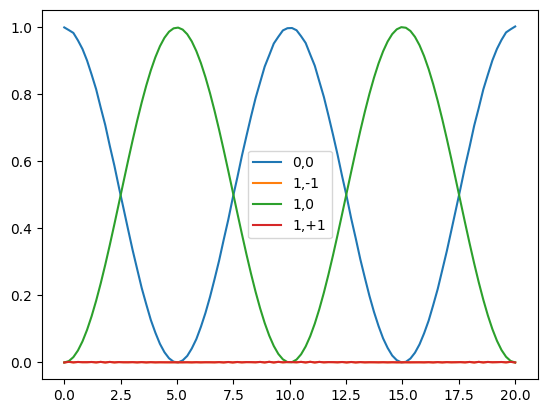

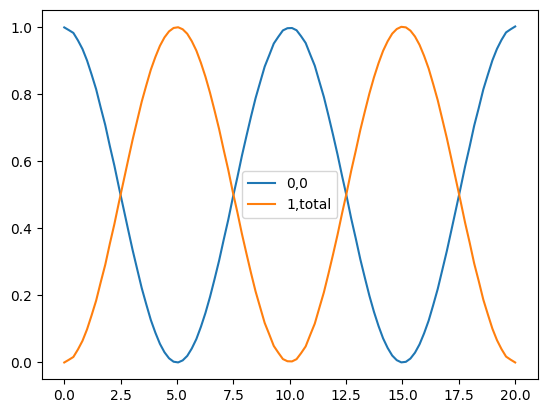

In [113]:
labels = ['0,0','1,-1','1,0','1,+1']
for i,y in enumerate(soln.y):
    plt.plot(soln.t,real(conjugate(y)*y),label=labels[i])
plt.legend(loc='best')
plt.show()
plt.plot(soln.t,real(conjugate(soln.y[0])*soln.y[0]),label=labels[0])
plt.plot(soln.t,real(conjugate(soln.y[1])*soln.y[1]+
                     conjugate(soln.y[2])*soln.y[2]+
                     conjugate(soln.y[3])*soln.y[3]),label='1,total')
plt.legend(loc='best')
plt.show()

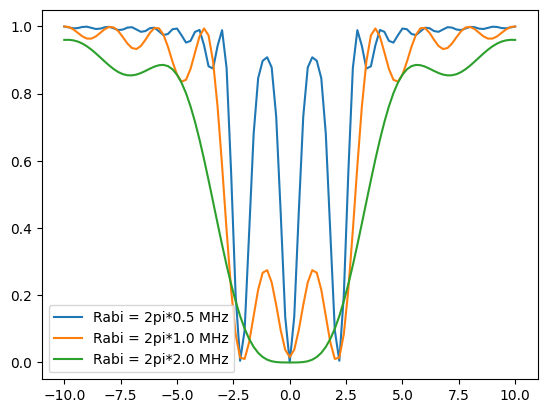

In [127]:
# resonance experiment.
# if we turn down the strength of the driving field we should be able to resolve the hyperfine structure

detunings = 2*pi*linspace(-10,10,101) # 2*pi*MHz

# power broadening is ~ 1.6*rabi, so want rabi_max/2pi > 4 MHz/1.6 to obscure the hyperfine structure
rabis = 2*pi*array([0.5,1,2]) # 2*pi*MHz.  

p0 = zeros(len(detunings))

fig,ax = plt.subplots()

for j,o1 in enumerate(rabis):
    for i,d in enumerate(detunings):
        
        tmax = (pi/o1)
        tpts = linspace(tmin,tmax,numsteps)
        
        o2 = o3 = o1 # assume that all transitions between ms=0 and ms=1 are driven equally

        # atom+field Hamiltonian, hbar=1
#         Haf = lambda t : 0.5*array([[0,-o1*exp(1j*(d1-d)*t),-o2*exp(1j*(d2-d)*t),-o3*exp(1j*(d3-d)*t)],
#                             [-o1*exp(-1j*(d1-d)*t),2*(d1-d),0,0],
#                             [-o2*exp(-1j*(d2-d)*t),0,2*(d2-d),0],
#                             [-o3*exp(-1j*(d3-d)*t),0,0,2*(d3-d)]])
        Haf = lambda t : 0.5*array([[0,-o1*exp(1j*(d1-d)*t),-o2*exp(1j*(d2-d)*t),-o3*exp(1j*(d3-d)*t)],
                            [-o1*exp(-1j*(d1-d)*t),0,0,0],
                            [-o2*exp(-1j*(d2-d)*t),0,0,0],
                            [-o3*exp(-1j*(d3-d)*t),0,0,0]])

        dpsi = lambda t,state: -1j*dot(Haf(t),state)

        soln = solve_ivp(dpsi,[tmin,tmax],psi0, t_eval=tpts,vectorized=True)
        p0[i] = abs(soln.y[0,-1])**2

    ax.plot(detunings/(2*pi),p0,label=f'Rabi = 2pi*{o1/(2*pi)} MHz')
plt.legend()
plt.show()

## Ramsey experiment - four levels

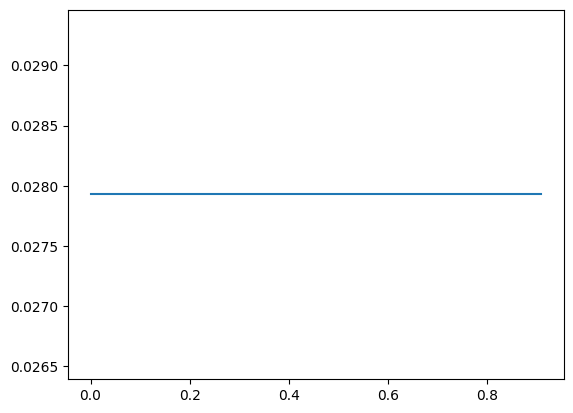

In [87]:
## Rabi oscillation in four level NV center

# triplet manifold, ignoring the m=-1
#
#         ---- mf=+1, +200 MHz detuned by N spin
#       /
# ms=-1 ---- ms=+1, 0 MHz detuned by N spin.
#  |    \
#  |     ---- ms=+1, +200 MHz detuned by N spin
#  |
#  | ~ 2.85 GHz
#  |
#  |
# ms=0 ----

psi0 = array([1/2,1/6,1/6,1/6], complex) # population starts in superposition of ms=0 and ms=1

d1 = -2*pi*2.2 # MHz
d2 = 0
d3 = -d1
o1 = o2 = o3 = 2*pi*0.01 # assume that all transitions between ms=0 and ms=1 are driven equally (unpolarized light?)

# atom+field Hamiltonian, hbar=1
Haf = 0.5*array([[0,-o1,-o2,-o3],[-o1,2*d1,0,0],[-o2,0,2*d2,0],[-o3,0,0,2*d3]])

numsteps = 25
tmin = 0
tmax = pi/(2*o1) # pi/2 time

tgaps = linspace(0,4*pi/abs(d1),31)
p0 = zeros(len(tgaps))
for i,tgap in enumerate(tgaps):
    state = array([psi0[0], psi0[1]*exp(-1j*d1*tgap), psi0[2]*exp(-1j*d2*tgap), psi0[3]*exp(-1j*d3*tgap)]) 
    dpsi = lambda t,state: -1j*dot(Haf,state)
    soln = solve_ivp(dpsi,[tmin,tmax],psi0,vectorized=True)
    p0[i] = abs(soln.y[1,-1])**2
plt.plot(tgaps,p0)

In [80]:
exp(-1j*d1*tgaps)

array([ 1.        +0.00000000e+00j,  0.30901699+9.51056516e-01j,
       -0.80901699+5.87785252e-01j, -0.80901699-5.87785252e-01j,
        0.30901699-9.51056516e-01j,  1.        -2.44929360e-16j,
        0.30901699+9.51056516e-01j, -0.80901699+5.87785252e-01j,
       -0.80901699-5.87785252e-01j,  0.30901699-9.51056516e-01j,
        1.        -4.89858720e-16j])

In [78]:
state

array([0.5       +0.00000000e+00j, 0.16666667-8.16431199e-17j,
       0.16666667+0.00000000e+00j, 0.16666667+8.16431199e-17j])

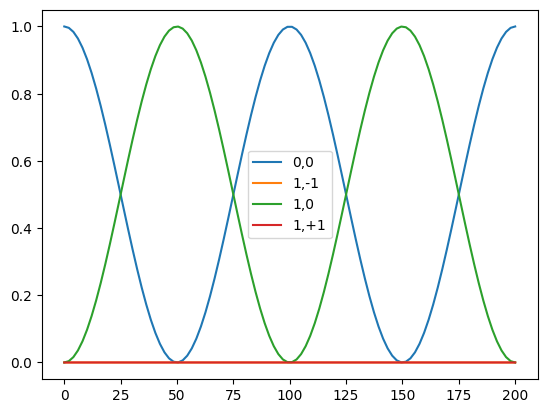

In [51]:
labels = ['0,0','1,-1','1,0','1,+1']
for i,y in enumerate(soln.y):
    plt.plot(soln.t,real(conjugate(y)*y),label=labels[i])
plt.legend(loc='best')

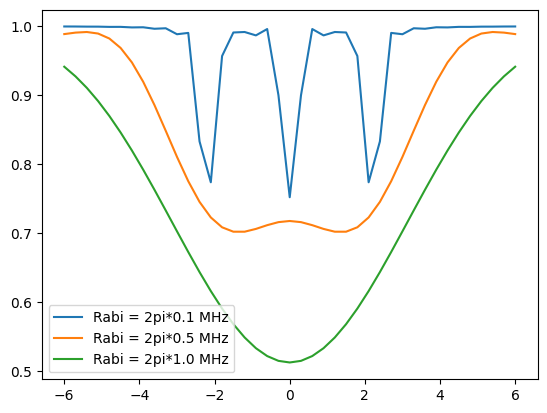

In [70]:
# resonance experiment.
# if we turn down the strength of the driving field we should be able to resolve the hyperfine structure

detunings = 2*pi*linspace(-6,6,41) # 2*pi*MHz

# power broadening is ~ 1.6*rabi, so want rabi_max/2pi > 4 MHz/1.6 to obscure the hyperfine structure
rabis = 2*pi*array([0.1,0.5,1]) # 2*pi*MHz.  

p0 = zeros(len(detunings))

fig,ax = plt.subplots()

for j,o1 in enumerate(rabis):
    for i,d in enumerate(detunings):
        
        tmax = 0.33*(pi/o1)
        tpts = linspace(tmin,tmax,numsteps)
        
        o2 = o3 = o1 # assume that all transitions between ms=0 and ms=1 are driven equally

        # atom+field Hamiltonian, hbar=1
        Haf = 0.5*array([[0,-o1,-o2,-o3],[-o1,2*(d1-d),0,0],[-o2,0,2*(d2-d),0],[-o3,0,0,2*(d3-d)]])

        dpsi = lambda t,state: -1j*dot(Haf,state)

        soln = solve_ivp(dpsi,[tmin,tmax],psi0, t_eval=tpts,vectorized=True)
        p0[i] = abs(soln.y[0,-1])**2

    ax.plot(detunings/(2*pi),p0,label=f'Rabi = 2pi*{o1/(2*pi)} MHz')
plt.legend()
plt.show()